In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from sklearn import preprocessing

In [73]:
df_sessions = pd.read_csv("data_challenge_sessions.csv")
df_sessions.head()

,user_id,start_time,end_time
0,398814,2001-02-01T00:04:00,2001-02-01T00:11:00
1,399018,2001-02-01T00:12:00,2001-02-01T00:53:00
2,399006,2001-02-01T00:12:00,2001-02-01T00:36:00
3,399006,2001-02-01T00:16:00,2001-02-01T00:16:00
4,399406,2001-02-01T00:28:00,2001-02-01T00:38:00


In [4]:
df_uploads = pd.read_csv("data_challenge_uploads.csv")
df_uploads.head()

,user_id,date,upload_count
0,301598,2001-02-01,2
1,308798,2001-02-01,1
2,399006,2001-02-01,5
3,399018,2001-02-01,1
4,399602,2001-02-01,15


# Data Prep

In [6]:
#convert date_login, start_time, end_time to datetime
df_uploads['date_login'] = pd.to_datetime(df_uploads['date'].str.strip(), dayfirst=True)
df_sessions['start_time_c'] = pd.to_datetime(df_sessions['start_time'])
df_sessions['end_time_c'] = pd.to_datetime(df_sessions['end_time'])

#add datetime column 'date_login' to sessions data set based on 'start_time' to help join with uploads dataset
df_sessions['date_login'] = df_sessions['start_time_c'].dt.normalize()

In [7]:
df_uploads = df_uploads.drop(["date"], axis = 1)
df_sessions = df_sessions.drop(["start_time", "end_time"], axis = 1)

In [8]:
df_sessions.head()

,user_id,start_time_c,end_time_c,date_login
0,398814,2001-02-01 00:04:00,2001-02-01 00:11:00,2001-02-01
1,399018,2001-02-01 00:12:00,2001-02-01 00:53:00,2001-02-01
2,399006,2001-02-01 00:12:00,2001-02-01 00:36:00,2001-02-01
3,399006,2001-02-01 00:16:00,2001-02-01 00:16:00,2001-02-01
4,399406,2001-02-01 00:28:00,2001-02-01 00:38:00,2001-02-01


In [9]:
df_uploads.head()

,user_id,upload_count,date_login
0,301598,2,2001-02-01
1,308798,1,2001-02-01
2,399006,5,2001-02-01
3,399018,1,2001-02-01
4,399602,15,2001-02-01


In [10]:
#merge sessions and uploads data frames on user id and date_login
df_merge = pd.merge(df_sessions, df_uploads, on = ['user_id','date_login'])
df_merge.head()

,user_id,start_time_c,end_time_c,date_login,upload_count
0,399018,2001-02-01 00:12:00,2001-02-01 00:53:00,2001-02-01,1
1,399018,2001-02-01 20:43:00,2001-02-01 20:45:00,2001-02-01,1
2,399006,2001-02-01 00:12:00,2001-02-01 00:36:00,2001-02-01,5
3,399006,2001-02-01 00:16:00,2001-02-01 00:16:00,2001-02-01,5
4,399006,2001-02-01 22:03:00,2001-02-01 23:00:00,2001-02-01,5


In [11]:
#check for any null values in merged df
df_merge.isnull().values.any()

False

In [13]:
#validate the merge
df_merge['start_date'] = df_merge['start_time_c'].dt.normalize()
df_merge.query('start_date != date_login')

,user_id,start_time_c,end_time_c,date_login,upload_count,start_date


In [14]:
df_merge = df_merge.drop(["start_date"], axis = 1)

In [18]:
#calculate session duration in minutes
df_merge['session_dur'] = df_merge['end_time_c'] - df_merge['start_time_c']
df_merge['session_dur']=df_merge['session_dur']/np.timedelta64(1,'m')

In [19]:
df_merge.head()

,user_id,start_time_c,end_time_c,date_login,upload_count,session_dur
0,399018,2001-02-01 00:12:00,2001-02-01 00:53:00,2001-02-01,1,41.0
1,399018,2001-02-01 20:43:00,2001-02-01 20:45:00,2001-02-01,1,2.0
2,399006,2001-02-01 00:12:00,2001-02-01 00:36:00,2001-02-01,5,24.0
3,399006,2001-02-01 00:16:00,2001-02-01 00:16:00,2001-02-01,5,0.0
4,399006,2001-02-01 22:03:00,2001-02-01 23:00:00,2001-02-01,5,57.0


In [20]:
#Get Week Number for each based on upload date (date_login)
df_merge['Week_Number'] = df_merge['date_login'].dt.week - 4

In [21]:
df_merge.head()

,user_id,start_time_c,end_time_c,date_login,upload_count,session_dur,Week_Number
0,399018,2001-02-01 00:12:00,2001-02-01 00:53:00,2001-02-01,1,41.0,1
1,399018,2001-02-01 20:43:00,2001-02-01 20:45:00,2001-02-01,1,2.0,1
2,399006,2001-02-01 00:12:00,2001-02-01 00:36:00,2001-02-01,5,24.0,1
3,399006,2001-02-01 00:16:00,2001-02-01 00:16:00,2001-02-01,5,0.0,1
4,399006,2001-02-01 22:03:00,2001-02-01 23:00:00,2001-02-01,5,57.0,1


In [22]:
df_merge.dtypes

user_id                  int64
start_time_c    datetime64[ns]
end_time_c      datetime64[ns]
date_login      datetime64[ns]
upload_count             int64
session_dur            float64
Week_Number              int64
dtype: object

In [23]:
df_merge.shape

(59454, 7)

In [24]:
df_merge.set_index('user_id', inplace=True)

df_merge['CohortGroup'] = df_merge.groupby(level=0)['Week_Number'].min()
df_merge.reset_index(inplace=True)

In [25]:
df_merge.head()

,user_id,start_time_c,end_time_c,date_login,upload_count,session_dur,Week_Number,CohortGroup
0,399018,2001-02-01 00:12:00,2001-02-01 00:53:00,2001-02-01,1,41.0,1,1
1,399018,2001-02-01 20:43:00,2001-02-01 20:45:00,2001-02-01,1,2.0,1,1
2,399006,2001-02-01 00:12:00,2001-02-01 00:36:00,2001-02-01,5,24.0,1,1
3,399006,2001-02-01 00:16:00,2001-02-01 00:16:00,2001-02-01,5,0.0,1,1
4,399006,2001-02-01 22:03:00,2001-02-01 23:00:00,2001-02-01,5,57.0,1,1


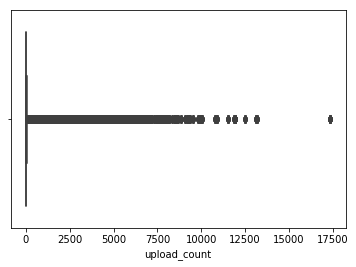

In [26]:
import seaborn as sns
sns.boxplot(x=df_merge['upload_count'])

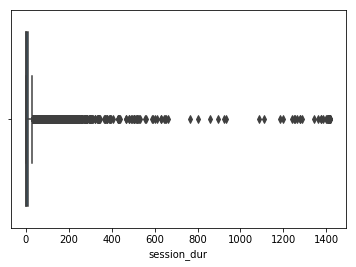

In [27]:
import seaborn as sns
sns.boxplot(x=df_merge['session_dur'])

In [29]:
df_merge = df_merge.drop(["start_time_c","end_time_c"], axis = 1)

In [33]:
df_merge = df_merge.drop(["date_login"], axis = 1)

In [34]:
#IQR Method to remove outliers
Q1 = df_merge.quantile(0.25)
Q3 = df_merge.quantile(0.75)
IQR = Q3 - Q1
df_merge_out = df_merge[~((df_merge < (Q1 - 1.5 * IQR)) |(df_merge > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
#14,685 rows removed
df_merge_out.shape

(44769, 5)

# Cohort Analysis

In [36]:
#grouping
df_grouped = df_merge_out.groupby(['CohortGroup', 'Week_Number'])

# count the unique users, total upload count, avg. session duration for each group
df_cohorts = df_grouped.agg({'user_id': pd.Series.nunique,
                       'upload_count': np.sum,
                       'session_dur':np.mean})

# make the column names more meaningful
df_cohorts.rename(columns={'user_id': 'TotalUsers',
                        'upload_count': 'TotalUploads',
                         'session_dur':'AvgDuration'}, inplace=True)

In [37]:
#udf to create Cohort Period column -- nth period based on user's first session
def cohort_period(df):
    
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

df_cohorts = df_cohorts.groupby(level=0).apply(cohort_period)

In [38]:
# reindex the DataFrame
df_cohorts.reset_index(inplace=True)
df_cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
df_cohorts_grp_size = df_cohorts['TotalUsers'].groupby(level=0).first()
df_cohorts_grp_size.head()

CohortGroup
1     552
2    1402
3    1077
4     896
5     429
Name: TotalUsers, dtype: int64

In [39]:
df_cohorts['TotalUsers'].unstack(0).head(20)

CohortGroup,1,2,3,4,5,6,7
CohortPeriod,,,,,,,
1,552.0,1402.0,1077.0,896.0,429.0,24.0,6.0
2,189.0,269.0,280.0,247.0,120.0,4.0,1.0
3,118.0,167.0,178.0,175.0,93.0,3.0,NaN
4,91.0,136.0,126.0,143.0,60.0,3.0,NaN
5,77.0,122.0,110.0,120.0,56.0,3.0,NaN
6,71.0,96.0,98.0,100.0,54.0,2.0,NaN
7,60.0,95.0,100.0,86.0,41.0,1.0,NaN
8,53.0,194.0,91.0,83.0,23.0,NaN,NaN
9,57.0,210.0,78.0,33.0,NaN,NaN,NaN


In [69]:
df_user_retention = df_cohorts['TotalUsers'].unstack(0).divide(df_cohorts_grp_size, axis=1)
df_user_retention.head()

CohortGroup,1,2,3,4,5,6,7
CohortPeriod,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.342391,0.191869,0.259981,0.275670,0.279720,0.166667,0.166667
3,0.213768,0.119116,0.165274,0.195312,0.216783,0.125000,NaN
4,0.164855,0.097004,0.116992,0.159598,0.139860,0.125000,NaN
5,0.139493,0.087019,0.102136,0.133929,0.130536,0.125000,NaN


[Text(88,0.5,'Week of First Upload'),
 Text(0.5,52,'Returning After How Many Weeks?')]

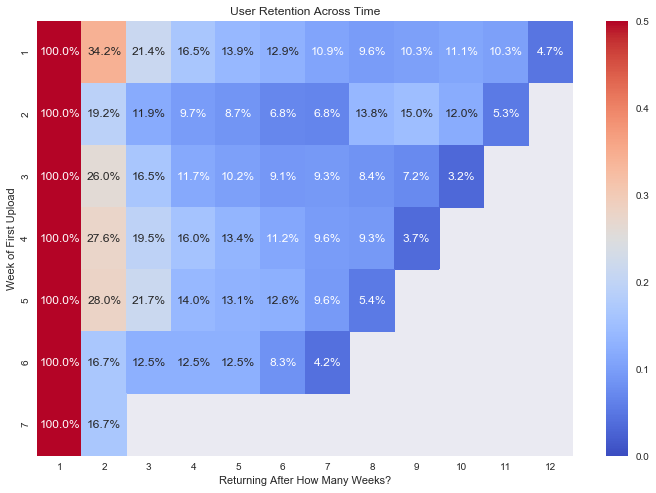

In [78]:
#heatmap

sns.set(style='darkgrid')

plt.figure(figsize=(12, 8))
plt.title('User Retention Across Time')
ax = sns.heatmap(df_user_retention.T, mask=df_user_retention.T.isnull(), annot=True, fmt='.1%',  vmin = 0, vmax = 0.5, 
            cmap='coolwarm');
ax.set(xlabel='Returning After How Many Weeks?', ylabel='Week of First Upload')

# Aggregates

In [45]:
#total unique users
#4415 after outliers removed, 5334 before
df_merge.user_id.nunique()
df_merge_out.user_id.nunique()

4415

In [62]:
#avg. session duration = 4.9 min
df_merge_out.describe()

#uploads per week
df_uploads_wk = df_merge_out.groupby('Week_Number')['upload_count'].sum()
df_uploads_wk.head(10)

Week_Number
1      9805
2     36603
3     43758
4     50858
5     49679
6     30265
7     21129
8     19435
9     18988
10    16708
Name: upload_count, dtype: int64

Text(0,0.5,'Number of Uploads')

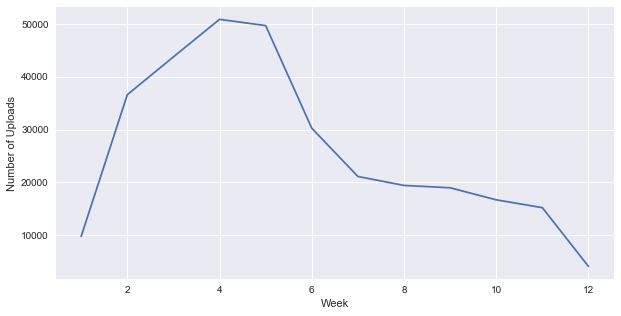

In [63]:
plt = df_uploads_wk.plot(figsize=(10,5))
plt.set_xlabel("Week")
plt.set_ylabel("Number of Uploads")

In [49]:
#session duration per week
df_dur_wk = df_merge_out.groupby('Week_Number')['session_dur'].mean()

df_dur_wk.head(12)

Week_Number
1     5.654159
2     4.503344
3     5.059600
4     4.991186
5     4.854590
6     4.725510
7     5.016762
8     5.173399
9     4.818846
10    4.451365
11    4.908201
12    4.507881
Name: session_dur, dtype: float64

Text(0,0.5,'Average Session Duration (min.)')

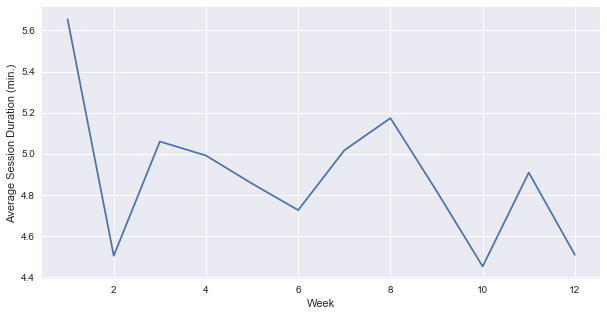

In [56]:
plt = df_dur_wk.plot(figsize=(10,5))
plt.set_xlabel("Week")
plt.set_ylabel("Average Session Duration (min.)")